#Source: 
#http://www.bogotobogo.com/python/python_numpy_batch_gradient_descent_algorithm.php

In [2]:
import numpy as np
import random
import sklearn
from sklearn.datasets.samples_generator import make_regression
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [14]:
def gradient_descent(alpha, x, y, ep, max_iter=1000):
    converged = False
    iteration = 0
    m = x.shape[0] #number of samples
    
    #initial theta
    t0 = np.random.random(x.shape[1])
    t1 = np.random.random(x.shape[1])
    
    
    #total error, J(theta)
    J = sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)])
    
    #Iterate Loop
    while not converged:
        #for each training sample, compute the gradient d/d_thate j(theta)
        #This is our average cost function 
        grad0 = (1.0/m) * sum([(t0 + t1*x[i] - y[i]) for i in range(m)])
        grad1 = (1.0/m) * sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])
        
        #update temp theta
        temp0 = t0 - alpha*grad0
        temp1 = t1 - alpha*grad1
        
        #update theta
        t0 = temp0
        t1 = temp1
        
        
        # mean squared error
        
        e = sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)])
        
        if abs(J-e) <=ep:
            print 'Converged, iterations: ', iteration
            converged = True
            
        J = e #update error
        iteration +=1 #update iterations
        
        #set condition for limit
        if iteration == max_iter:
            print "Max interations exceeeded"
            converged = True
        
    return t0, t1

In [9]:
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35) 
print 'x.shape = %s y.shape = %s' %(x.shape, y.shape)

x.shape = (100, 1) y.shape = (100,)


In [15]:
alpha = .01 #learning rate
ep = .01 #convergence criteria

#run gradient descent and get intercept(theta0) and slope(theta1)
theta0, theta1 = gradient_descent(alpha, x,y, ep, max_iter=1000)
print ('theta0 = %s theta1 = %s') %(theta0, theta1) 

Converged, iterations:  641
theta0 = [-2.81950488] theta1 = [ 43.13874476]


In [18]:
#Double check with scipy to confirm

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x[:,0], y)

print ('intercept = %s slope = %s') %(intercept, slope)

intercept = -2.84963639461 slope = 43.2042438802


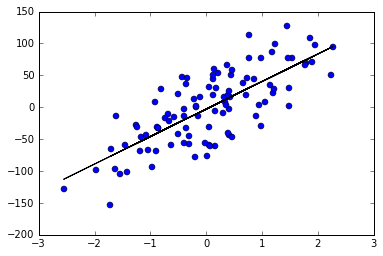

In [21]:
for i in range(x.shape[0]):
    y_predict = theta0 + theta1*x
    
plt.plot(x,y,'o')
plt.plot(x,y_predict,'k-')
plt.show()
